In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-check/winequality-white.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('/kaggle/input/wine-quality-check/winequality-white.csv', sep=';')
#Loading the dataset to a data frame

In [4]:
data.shape

(4898, 12)

In [5]:
#Type of the data and checking what are the labels or columnns
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
514,7.8,0.28,0.32,9.0,0.036,34.0,115.0,0.9952,3.17,0.39,10.3,7
1363,6.9,0.32,0.16,1.4,0.051,15.0,96.0,0.9940,3.22,0.38,9.5,4
690,6.9,0.20,0.34,1.9,0.043,25.0,136.0,0.9935,3.31,0.60,10.1,4
4532,5.8,0.12,0.21,1.3,0.056,35.0,121.0,0.9908,3.32,0.33,11.4,6
1234,7.7,0.26,0.31,1.3,0.043,47.0,155.0,0.9937,3.42,0.50,10.1,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data.duplicated().sum()

937

In [9]:
#Finding the correlation in the quality of the wine
data.corr()['quality']
# If it is positive then in increase of one the other increases else vice versa

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

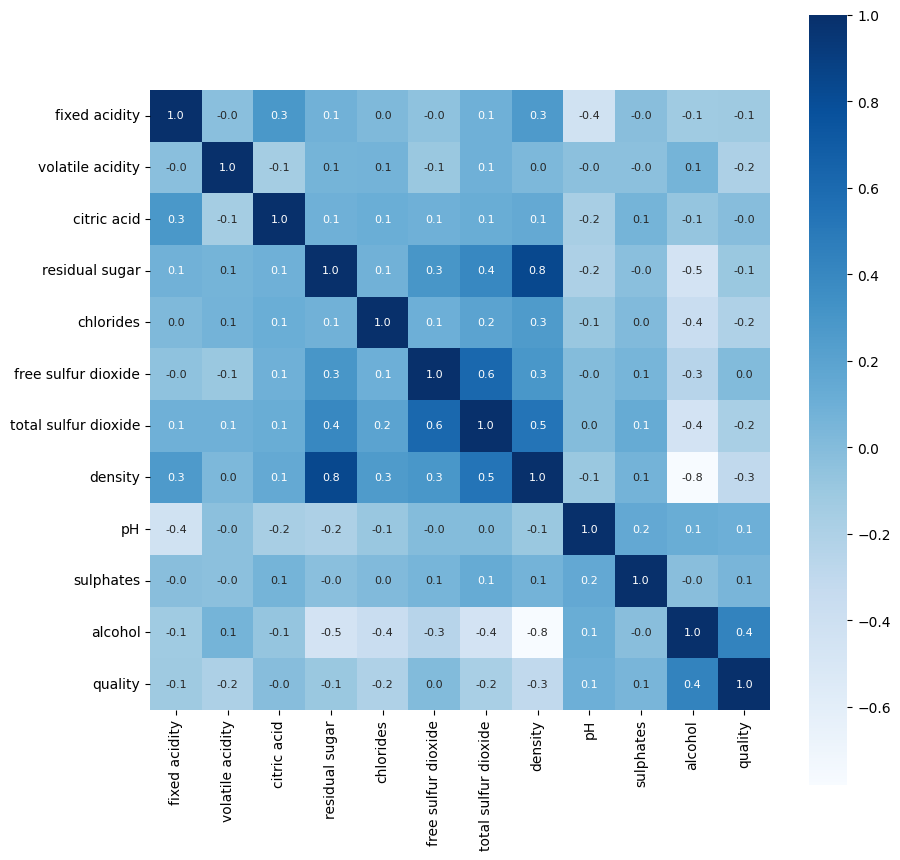

In [10]:
cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
#No data is missing but a lot of duplicate data is available
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Univariate Data Analysis of Categorical data**

<Axes: ylabel='quality'>

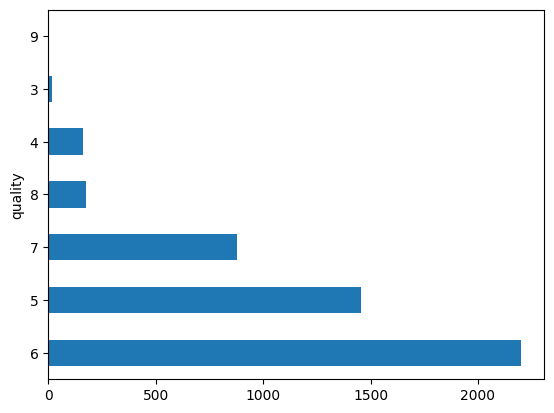

In [12]:
data['quality'].value_counts().plot(kind='barh')

**Univariate Data Analysis of Numerical data**

In [13]:
# Replace 'your_value' and 'your_label' with the actual value and label you want to filter
value_to_drop = 9
label_to_check = 'quality'

# Create a boolean mask to identify columns with the specified value
mask = (data[label_to_check] == value_to_drop)
df= data[~mask]

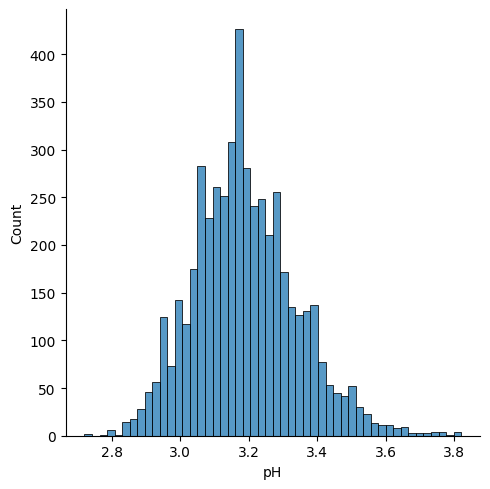

In [14]:
sns.displot(df['pH'])

<Axes: xlabel='quality', ylabel='volatile acidity'>

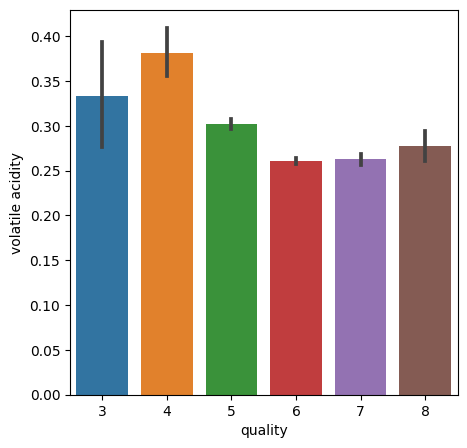

In [15]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data= df)

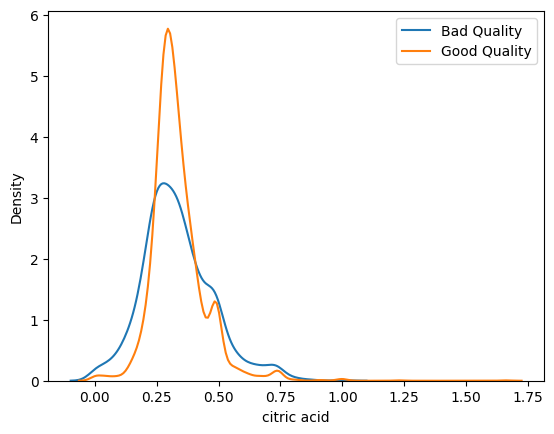

In [16]:
sns.kdeplot(data=df[df['quality'] < 6], x='citric acid', fill=False, label='Bad Quality')
sns.kdeplot(data=df[df['quality'] > 5], x='citric acid', fill=False, label='Good Quality')
plt.legend()
plt.show()

**Data Preprocessing**

In [17]:
#Separate the data and label
X=df.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [18]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4893, dtype: int64

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)
Y_test.shape

(979,)

**Model Building**

In [20]:
model= RandomForestClassifier()

In [21]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
#Model evaluation
X_pred= model.predict(X_test)
test_data_acc= accuracy_score(X_pred, Y_test)
test_data_acc

0.8621041879468846